In [1]:
# This is a Python 3 script

# Source Information

In [10]:
from astropy.io import ascii
# distance
dist = ascii.read('/Users/yaolun/data/cops-spire_distance.txt')
archive_dir = '/Volumes/SD-Mac/CDF_archive_v2/'

# source list
obj_list = ['RCrA-IRS7B','RCrA-IRS7C','HH46','L723-MM','L1014',
            'L1157','Ced110','BHR71','IRAS03245','L1551-IRS5',
            'L1455-IRS3','B1-a','B1-c','IRAS03301','TMR1',
            'TMC1A','TMC1','IRAS15398','RNO91','GSS30-IRS1',
            'VLA1623','WL12','RCrA-IRS5A','L483','B335',
            'DKCha']
l_bol_list = [19.0, 44.4, 23.2, 3.3, 0.327,
              5.41, 0.89, 13.5, 6.13, 23.5,
              0.521, 2.33, 4.4, 3.81, 1.96,
              2.62, 0.792, 1.49, 2.26, 19.7,
              5.36, 2.29, 4.61, 8.78, 0.564,
              34.7]
t_bol_list = [51.3, 98.3, 105.0, 66.7, 63.5,
              41.8, 53.6, 51.1, 48.4, 109.0,
              129.0, 80.5, 55.8, 361.0, 126.0,
              158.0, 149.0, 41.6, 231.0, 129.0,
              33.1, 207.0, 115.0, 49.3, 45.4,
              597.0]
alpha500_list = [2.77, 2.81, 2.43, 2.16, 1.85,
                 2.27, 2.34, 2.59, 2.47, 2.74,
                 1.55, 1.74, 2.08, 2.07, 2.39,
                 2.29, 2.00, 2.43, 2.46, 2.67,
                 2.66, 2.41, 2.56, 2.53, 2.30,
                 2.08]

# Submillimeter Luminosity

In [11]:
def lsubmm(low_wave, spec, dist):
    """
    spec = 'Wavelength(um)' and 'Flux_Density(Jy)'
    dist: distance in parsec
    """
    import sys
    sys.path.append('/Users/yaolun/programs/misc/hyperion/')
    from l_bol import l_bol
    
    l = l_bol(spec['Wavelength(um)'][spec['Wavelength(um)'] >= low_wave],
              spec['Flux_Density(Jy)'][spec['Wavelength(um)'] >= low_wave], dist)
    return l.data[0]

RCrA-IRS7B 0.150941157376 19.0 51.3 125.876867054
RCrA-IRS7C 0.152121038109 44.4 98.3 291.872843836
HH46 0.189732597922 23.2 105.0 122.277353781
L723-MM 0.0657261782949 3.3 66.7 50.2083049039
L1014 0.0241873519017 0.327 63.5 13.5194626236
L1157 0.106669579276 5.41 41.8 50.717365126
Ced110 0.0207226612071 0.89 53.6 42.9481518374
BHR71 0.161673190665 13.5 51.1 83.5017849559
IRAS03245 0.0512886566335 6.13 48.4 119.519605355
L1551-IRS5 0.0777980776847 23.5 109.0 302.064018795
L1455-IRS3 0.0458527342071 0.521 129.0 11.3624630899
B1-a 0.0934436647323 2.33 80.5 24.9348097239
B1-c 0.115691858541 4.4 55.8 38.0320625453
IRAS03301 0.0483955856362 3.81 361.0 78.7261885545
TMR1 0.0149406509961 1.96 126.0 131.185716105
TMC1A 0.0153518791321 2.62 158.0 170.663146671
TMC1 0.015393789212 0.792 149.0 51.4493208326
IRAS15398 0.0323112225541 1.49 41.6 46.1140087629
RNO91 0.0153221845801 2.26 231.0 147.498549452
GSS30-IRS1 0.0592557953155 19.7 129.0 332.456933454
VLA1623 0.125718358942 5.36 33.1 42.6349822

(0, 400)

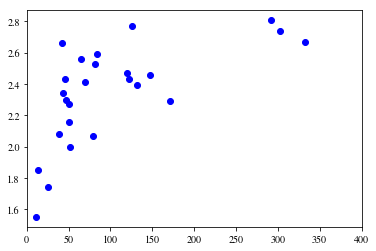

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
for o in obj_list:
    spec = ascii.read(archive_dir+o+'/spire/data/'+o+'_spire_corrected.txt')
    l = lsubmm(350, spec, dist['distance'][dist['object'] == o])
    print(o, l, l_bol_list[obj_list.index(o)], t_bol_list[obj_list.index(o)], l_bol_list[obj_list.index(o)]/l)
    plt.plot(l_bol_list[obj_list.index(o)]/l, alpha500_list[obj_list.index(o)], 'o', color='b')
plt.xlim([0,400])

# Alpha at 500 um

In [10]:
for o in obj_list:
    print(o, ascii.read(archive_dir+o+'/spire/data/'+o+'_alpha.txt')['500um'].data[0])

('RCrA-IRS7B', 2.767245)
('RCrA-IRS7C', 2.8121130000000001)
('HH46', 2.4324050000000002)
('L723-MM', 2.155815)
('L1014', 1.854385)
('L1157', 2.2730769999999998)
('Ced110', 2.3403130000000001)
('BHR71', 2.589369)
('IRAS03245', 2.4729009999999998)
('L1551-IRS5', 2.7363089999999999)
('L1455-IRS3', 1.54925)
('B1-a', 1.7430490000000001)
('B1-c', 2.0847859999999998)
('IRAS03301', 2.067377)
('TMR1', 2.3868420000000001)
('TMC1A', 2.2854700000000001)
('TMC1', 2.0044240000000002)
('IRAS15398', 2.4372739999999999)
('RNO91', 2.4560580000000001)
('GSS30-IRS1', 2.6679200000000001)
('VLA1623', 2.660031)
('WL12', 2.409173)
('RCrA-IRS5A', 2.5608399999999998)
('L483', 2.5290620000000001)
('B335', 2.297253)
('DKCha', 2.077604)
